<a href="https://colab.research.google.com/github/yura123123/Computer_Vision_NULP/blob/main/Lab_2/CV_lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow

In [5]:
import imutils

In [17]:
posters = cv2.imread("posters/1.jpg")
#poster = cv2.imread("posters/2.jpg")
poster = cv2.imread("posters/3.jpg")

posters_img = cv2.cvtColor(posters, cv2.COLOR_BGR2RGB)
poster_img = cv2.cvtColor(poster, cv2.COLOR_BGR2RGB)
poster_img_rot = imutils.rotate(poster_img, angle=180)

gray_posters = cv2.cvtColor(posters_img, cv2.COLOR_RGB2GRAY)
gray_poster = cv2.cvtColor(poster_img, cv2.COLOR_RGB2GRAY)

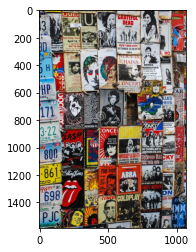

In [18]:
plt.imshow(posters_img)

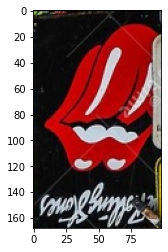

In [19]:
plt.imshow(poster_img_rot)

In [21]:
sift = cv2.SIFT_create()
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)
k1, des1 = sift.detectAndCompute(posters_img, None)
k2, des2 = sift.detectAndCompute(poster_img_rot, None)

In [22]:
def bf_cv2_matcher(k1, d1, img1, k2, d2, img2):
  matches = bf.match(d1, d2)
  best_matches = sorted(matches, key = lambda x: x.distance)[:10]
  match_img = cv2.drawMatches(img1, k1, img2, k2, best_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
  return match_img

def matcher_custom(k1, d1, img1, k2, d2, img2):
  matches = []
  for i in range(len(d1)):
    for j in range(len(d2)):
        matches.append(cv2.DMatch(_distance=np.linalg.norm(d1[i] - d2[j]), _imgIdx=0, _queryIdx=i, _trainIdx=j))

  matches = sorted(matches, key=lambda x: x.distance)[:10]

  match_img = cv2.drawMatches(img1, k1, img2, k2, matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
  return match_img

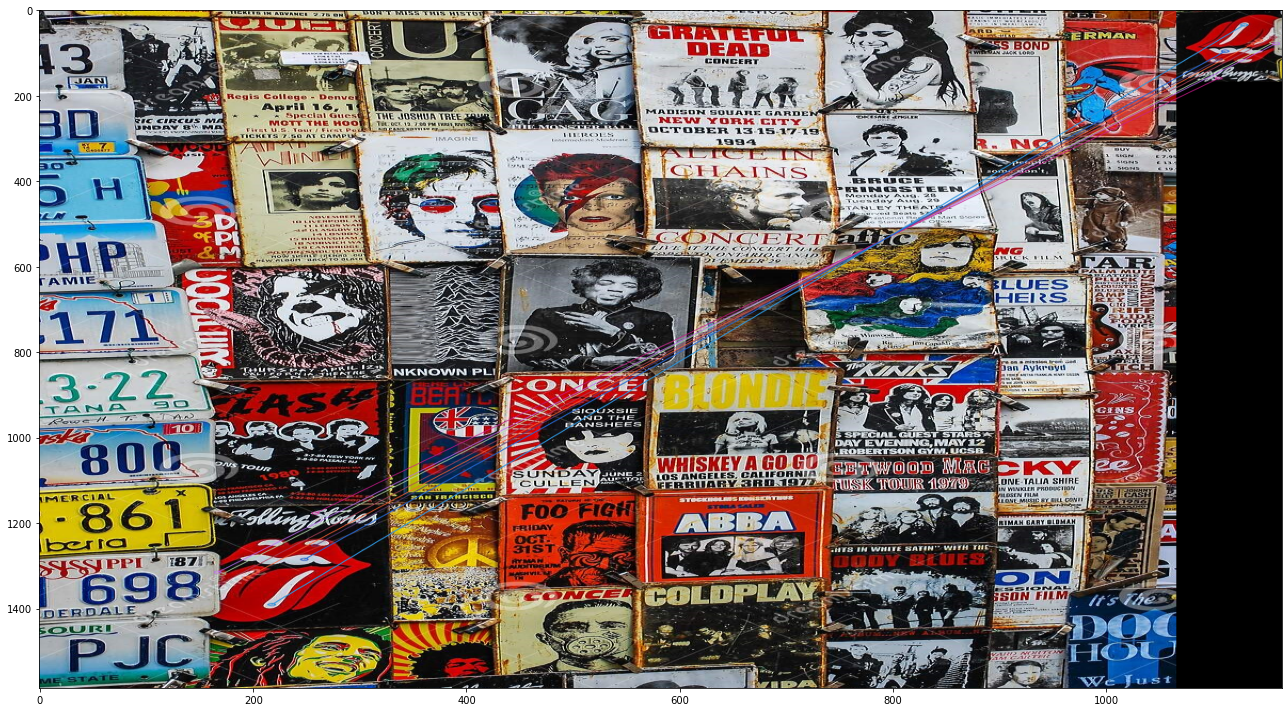

In [23]:
fig, ax = plt.subplots(figsize=(18, 10))
ax.imshow(bf_cv2_matcher(k1, des1, posters_img, k2, des2, poster_img_rot), aspect='auto')
plt.tight_layout()

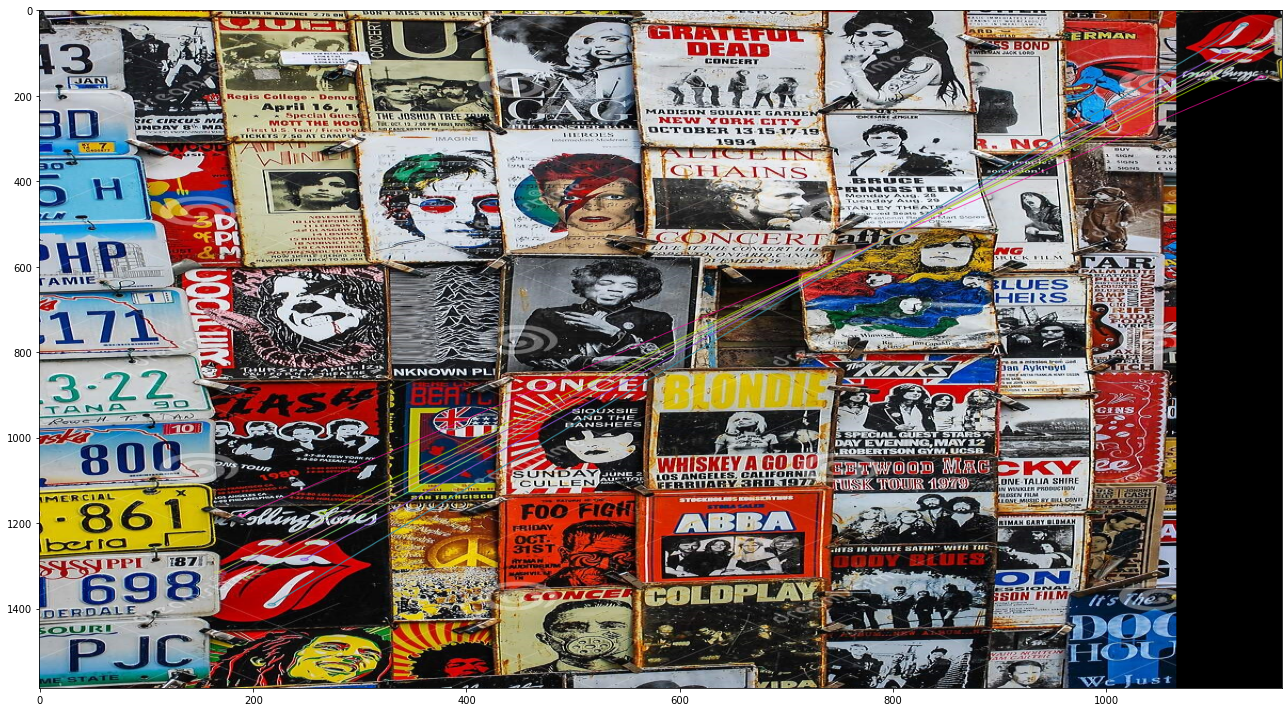

In [24]:
fig, ax = plt.subplots(figsize=(18, 10))
im = matcher_custom(k1,  des1, posters_img, k2, des2, poster_img_rot)
ax.imshow(im, aspect='auto')
plt.tight_layout()

In [25]:
k1, des1 = sift.detectAndCompute(gray_posters, None)
k2, des2 = sift.detectAndCompute(gray_poster, None)

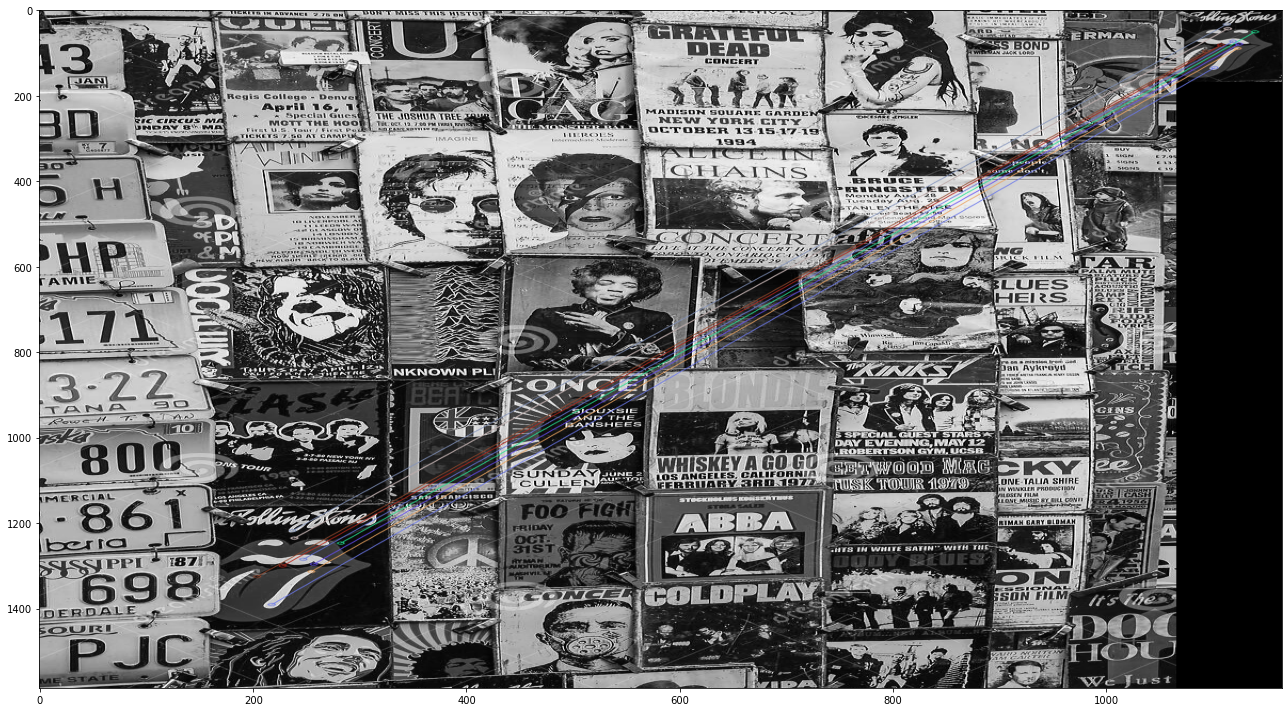

In [26]:
fig, ax = plt.subplots(figsize=(18, 10))
ax.imshow(bf_cv2_matcher(k1, des1, gray_posters, k2, des2, gray_poster), aspect='auto')
plt.tight_layout()

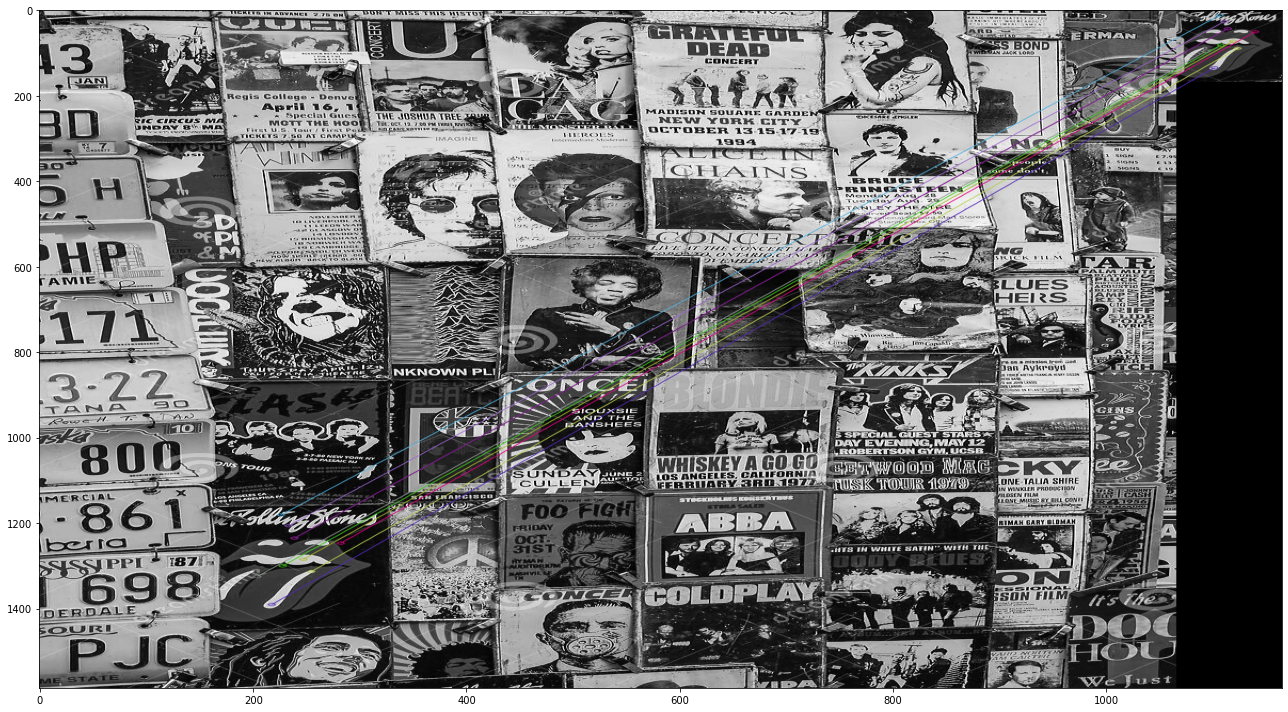

In [27]:
fig, ax = plt.subplots(figsize=(18, 10))
im = matcher_custom(k1,  des1, gray_posters, k2, des2, gray_poster)
ax.imshow(im, aspect='auto')
plt.tight_layout()